In [2]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix,graycoprops
import pandas as pd
import cv2

In [3]:
slices=[]
proList = ['contrast', 'homogeneity', 'ASM', 'energy']
featlist = ['sumValue','contrast', 'homogeneity', 'ASM', 'energy','hue', 'saturaton', 'value','label']
properties =np.zeros(5)
glcmMatrix = []
final=[]
folders = ["Skala0","Skala1","Skala2","Skala3","Skala4"]

Skala0
0


C:\Users\maula\AppData\Local\Temp\ipykernel_25408\3498153510.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  properties[j] = (graycoprops(glcmMatrix, prop=proList[j]))


Skala1
1
Skala2
2
Skala3
3
Skala4
4
300


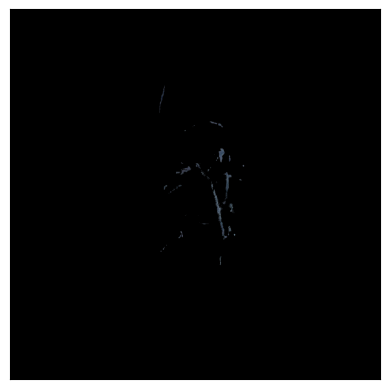

In [5]:
for folder in folders:
    print(folder)
    labell=folders.index(folder)
    print(labell)
    INPUT_SCAN_FOLDER="dataset/"+folder+"/"

    image_folder_list = os.listdir(INPUT_SCAN_FOLDER)
    # print(image_folder_list)

    for i in range(len(image_folder_list)):
        img = cv2.imread(INPUT_SCAN_FOLDER+image_folder_list[i])
        img = cv2.resize(img, (1000, 1000), interpolation = cv2.INTER_AREA)
        # print('Resized Dimensions : ',resized.shape)

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_hsv  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        lower_red = np.array([5,50, 50]) 
        upper_red  = np.array([20,255,255])

        mask = cv2.inRange(img_hsv, lower_red, upper_red)
        res = cv2.bitwise_and(img, img, mask=mask)

        # plt.imshow(res, cmap='Blues', interpolation = 'bicubic')
        plt.imshow(res)
        plt.xticks([]),plt.yticks([])

        sum=0
        result=res.flatten()
        #print(len(result))
        for k in range(3072):
            sum+=result[k]^2
        #print(sum)
        sqsum=math.sqrt(sum)
        #print(sqsum)

        h,s,v = cv2.split(img_hsv)

        h_mean = np.mean(h)
        s_mean = np.mean(s)
        v_mean = np.mean(v)

        glcmMatrix = (graycomatrix(img_gray, [1], [0], levels=2 ** 8))
        
        for j in range(0, len(proList)):
            properties[j] = (graycoprops(glcmMatrix, prop=proList[j]))

        features =np.array([sqsum, properties[0], properties[1], properties[2], properties[3], h_mean, s_mean, v_mean, labell])
        final.append(features)
print(len(final))


In [6]:
print(sqsum)

78.38367176906169


In [7]:
df = pd.DataFrame(final, columns=featlist)
df.to_csv("feature_dataset_1000px.csv")
s=pd.read_csv("feature_dataset_1000px.csv")
# for i in s.iterrows():
#      print(i)

In [8]:
import pandas as pd
df = pd.read_csv('feature_dataset_1000px.csv', index_col=0)
df.head()

,sumValue,contrast,homogeneity,ASM,energy,hue,saturaton,value,label
0,78.383672,16.656466,0.938295,0.037338,0.193229,102.019578,6.076716,239.601118,0.0
1,78.383672,21.848998,0.916269,0.041866,0.204611,107.860592,49.071800,219.021018,0.0
2,78.383672,21.972524,0.914382,0.026455,0.162651,107.707690,42.995309,214.469718,0.0
3,78.383672,53.700932,0.906272,0.058693,0.242267,111.507190,21.193654,218.849183,0.0
4,78.383672,21.086079,0.905031,0.041597,0.203954,108.038949,60.611979,215.771037,0.0
